In [13]:
#mount với drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

In [15]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/món ăn/train_mon_an'

In [16]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 275 images belonging to 10 classes.
Found 64 images belonging to 10 classes.


In [17]:
train_dataset.classes
print(train_dataset.class_indices)

{'banh beo': 0, 'banh cuon': 1, 'banh mi': 2, 'banh trang nuong': 3, 'banh xeo': 4, 'bun bo': 5, 'com suon': 6, 'goi cuon': 7, 'mi quang': 8, 'nem chua': 9}


In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                      

In [21]:
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
275/275 [==============================] - 97s 347ms/step - loss: 0.3572 - accuracy: 0.2000 - val_loss: 0.3462 - val_accuracy: 0.0938
Epoch 2/20
275/275 [==============================] - 4s 14ms/step - loss: 0.2739 - accuracy: 0.3891 - val_loss: 0.3452 - val_accuracy: 0.1875
Epoch 3/20
275/275 [==============================] - 4s 15ms/step - loss: 0.2040 - accuracy: 0.6036 - val_loss: 0.3540 - val_accuracy: 0.2812
Epoch 4/20
275/275 [==============================] - 4s 14ms/step - loss: 0.1467 - accuracy: 0.7818 - val_loss: 0.3787 - val_accuracy: 0.2812
Epoch 5/20
275/275 [==============================] - 4s 14ms/step - loss: 0.1036 - accuracy: 0.8800 - val_loss: 0.3284 - val_accuracy: 0.3594
Epoch 6/20
275/275 [==============================] - 4s 14ms/step - loss: 0.0654 - accuracy: 0.9709 - val_loss: 0.3893 - val_accuracy: 0.2656
Epoch 7/20
275/275 [==============================] - 4s 14ms/step - loss: 0.0421 - accuracy: 0.9927 - val_loss: 0.4313 - val_accuracy: 0.37

BÁNH CUỐN


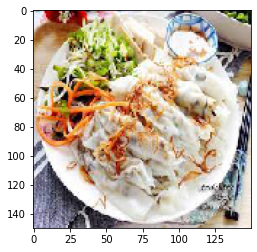

In [23]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/món ăn/banh_cuon.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("BÁNH BÈO ")
if(test==1):
    print("BÁNH CUỐN")
if(test ==2):
    print("BÁNH MÌ")
if(test==3):
    print("BÁNH TRÁNG NƯỚNG")
if(test ==4):
    print("BÁNH XÈO")
if(test==5):
    print("BÚN BÒ ")
if(test ==6):
    print("CƠM XƯỜN")
if(test==7):
    print("GỎI CUỐN")
if(test ==8):
    print("MÌ QUẢNG ")
if(test==9):
    print("NEM CHUA")


BÁNH MÌ


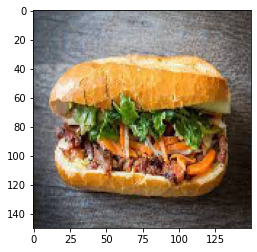

In [24]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/món ăn/test_banh_mi.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("BÁNH BÈO ")
if(test==1):
    print("BÁNH CUỐN")
if(test ==2):
    print("BÁNH MÌ")
if(test==3):
    print("BÁNH TRÁNG NƯỚNG")
if(test ==4):
    print("BÁNH XÈO")
if(test==5):
    print("BÚN BÒ ")
if(test ==6):
    print("CƠM XƯỜN")
if(test==7):
    print("GỎI CUỐN")
if(test ==8):
    print("MÌ QUẢNG ")
if(test==9):
    print("NEM CHUA")

BÁNH BÈO 


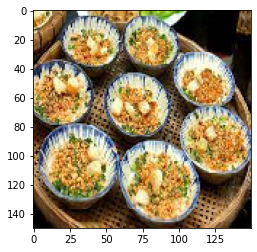

In [25]:
filename = "/content/drive/MyDrive/DỮ LIỆU AI PHẦN BT CNN/món ăn/test_banh_beo.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("BÁNH BÈO ")
if(test==1):
    print("BÁNH CUỐN")
if(test ==2):
    print("BÁNH MÌ")
if(test==3):
    print("BÁNH TRÁNG NƯỚNG")
if(test ==4):
    print("BÁNH XÈO")
if(test==5):
    print("BÚN BÒ ")
if(test ==6):
    print("CƠM XƯỜN")
if(test==7):
    print("GỎI CUỐN")
if(test ==8):
    print("MÌ QUẢNG ")
if(test==9):
    print("NEM CHUA")